# Benchmark EDF R&D 

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
import openturns.viewer as otv
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

We present the BBRC test cases using the otbenchmark module

In [3]:
p8 = otb.ReliabilityProblem8()
p14 = otb.ReliabilityProblem14()
p22 = otb.ReliabilityProblem22()
p24 = otb.ReliabilityProblem24()
p25 = otb.ReliabilityProblem25()
p28 = otb.ReliabilityProblem28()
p31 = otb.ReliabilityProblem31()
p33 = otb.ReliabilityProblem33()
p35 = otb.ReliabilityProblem35()
p38 = otb.ReliabilityProblem38()
p53 = otb.ReliabilityProblem53()
p55 = otb.ReliabilityProblem55()
p57 = otb.ReliabilityProblem57()
p75 = otb.ReliabilityProblem75()
p89 = otb.ReliabilityProblem89()
p107 = otb.ReliabilityProblem107()
p110 = otb.ReliabilityProblem110()
p111 = otb.ReliabilityProblem111()
p63 = otb.ReliabilityProblem63()
p91 = otb.ReliabilityProblem91()
p60 = otb.ReliabilityProblem60()
p77 = otb.ReliabilityProblem77()


x1 + 2 * x2 + 2 * x3 + x4 - 5 * x5 - 5 * x6
x1 - 32 / (pi * x2^3) * sqrt(x3^2 * x4^2 / 10 + x5^2)
2.5 - 1 / sqrt(2) * (x1 + x2) + 0.1 * (x1 - x2) ^2
2.5 - 0.2357 * (x1 - x2) + 0.00463 * (x1 + x2 - 20)^4
var g1 := x1^2 -8 * x2 + 16;var g2 := -16 * x1 + x2 + 32;gsys := max(g1, g2)
 x1 * x2 - 146.14 
2 - x2 + 256 * x1^4
min(-x1 - x2 - x3 + 3 * sqrt(3), -x3 + 3)
var g1 := 2 - x2 + exp(-0.1 * x1^2) + (0.2 * x1) ^ 4;var g2 := 4.5 - x1 * x2;gsys := min(g1, g2)
15.59*1e4 - x1*x2^3/(2*x3^3) *((x4^2-4*x5*x6*x7^2+x4*(x6+4*x5+2*x6*x7))/(x4*x5*(x4+x6+2*x6*x7)))
sin(5 * x1 / 2) + 2 - ( x1 * x1 + 4 ) * ( x2 - 1 ) / 20
var g1 := 0.2 + 0.6 * (x0 - x1)^4 - (x0 - x1) / sqrt(2);var g2 := 0.2 + 0.6 * (x0 - x1)^4 + (x0 - x1) / sqrt(2);var g3 := (x0 - x1) + 5 / sqrt(2) - 2.2;var g4 := (x1 - x0) + 5 / sqrt(2) - 2.2;gsys := min(g1, g2, g3, g4)
var g1 := -x1^2 + x2^3 + 3;var g2 := 2 - x1 - 8 * x2;var g3 := (x1 + 3)^2 + (x2 + 3)^2 - 4;gsys := min(max(g1, g2), g3) 
3 - x1 * x2
var g1 := -x1^2 - x2 + 8;var g2 := -

We list these problems

In [4]:
Liste_problem = [
    p8,
    p14,
    p22,
    p24,
    p25,
    p28,
    p31,
    p33,
    p35,
    p38,
    p53,
    p55,
    p57,
    p75,
    p89,
    p107,
    p110,
    p111,
    p63,
    p91,
    p60,
    p77
]
L = np.size(Liste_problem)
L

22

We use the following methods to solve the optimization problem "FORM" and "SORM"

In [5]:
# Cobyla algorithm
myCobyla = ot.Cobyla()
# Resolution options:
eps = 1e-3
myCobyla.setMaximumEvaluationNumber(100)
myCobyla.setMaximumAbsoluteError(eps)
myCobyla.setMaximumRelativeError(eps)
myCobyla.setMaximumResidualError(eps)
myCobyla.setMaximumConstraintError(eps)


In [6]:
# AbdoRackwitz algorithm
solver = ot.AbdoRackwitz()

# The FORM method

In [7]:
def FORM(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    p_exact = Problem.getProbability()
    Name = Problem.getName()
    algoFORM = ot.FORM(myCobyla, myEvent, myDistribution.getMean())
    initialNumberOfCall = g.getEvaluationCallsNumber()
    algoFORM.run()
    resultFORM = algoFORM.getResult()
    numberOfFunctionEvaluationsFORM = g.getEvaluationCallsNumber() - initialNumberOfCall
    return [resultFORM, numberOfFunctionEvaluationsFORM]

# The SORM method

In [8]:
def SORM(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    p_exact = Problem.getProbability()
    Name = Problem.getName()
    algoSORM = ot.SORM(myCobyla, myEvent, myDistribution.getMean())
    initialNumberOfCall = g.getEvaluationCallsNumber()
    algoSORM.run()
    resultSORM = algoSORM.getResult()
    numberOfFunctionEvaluationsSORM = g.getEvaluationCallsNumber() - initialNumberOfCall
    return [resultSORM, numberOfFunctionEvaluationsSORM]

# The MonteCarloSampling method

In [9]:
def MonteCarloSampling(Problem, NBS, cv):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    experiment = ot.MonteCarloExperiment()
    myMC = ot.ProbabilitySimulationAlgorithm(myEvent, experiment)
    
    myMC.setMaximumOuterSampling(NBS)
    myMC.setBlockSize(1)
    myMC.setMaximumCoefficientOfVariation(cv)
    initialNumberOfCall = g.getEvaluationCallsNumber()
    myMC.run()
    resultMC = myMC.getResult()
    numberOfFunctionEvaluationsMonteCarlo = g.getEvaluationCallsNumber() - initialNumberOfCall
    return [resultMC, numberOfFunctionEvaluationsMonteCarlo, myMC.drawProbabilityConvergence()]

# The ImportanceSampling method

In [10]:
def ImportanceSampling(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    p_exact = Problem.getProbability()
    Name = Problem.getName()
    algoFORM = ot.FORM(myCobyla, myEvent, myDistribution.getMean())
    initialNumberOfCall = g.getEvaluationCallsNumber()
    algoFORM.run()
    resultFORM = algoFORM.getResult()
    standardSpaceDesignPoint = resultFORM.getStandardSpaceDesignPoint()
    d = myDistribution.getDimension()
    myImportance = ot.Normal(standardSpaceDesignPoint, [1.0] * d , ot.CorrelationMatrix(d))
    experiment = ot.ImportanceSamplingExperiment(myImportance)
    algo = ot.ProbabilitySimulationAlgorithm(ot.StandardEvent(myEvent), experiment)
    algo.setMaximumCoefficientOfVariation(0.1)
    algo.setMaximumOuterSampling(50000)
    algo.setConvergenceStrategy(ot.Full())
    algo.run()
    resultTirage = algo.getResult()
    graph = algo.drawProbabilityConvergence()
    numberOfFunctionEvaluationsTirage = g.getEvaluationCallsNumber() - initialNumberOfCall
    return [resultTirage, numberOfFunctionEvaluationsTirage, graph]    

# The Subset method

In [11]:
def SubsetSampling(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    mySS = ot.SubsetSampling(myEvent)
    mySS.setMaximumOuterSampling(1000)
    mySS.setBlockSize(1)
    initialNumberOfCall = g.getEvaluationCallsNumber()
    mySS.run()
    graph = mySS.drawProbabilityConvergence()
    resultSS = mySS.getResult()
    numberOfFunctionSS = g.getEvaluationCallsNumber() - initialNumberOfCall
    return [resultSS, numberOfFunctionSS, graph]
    

The following function computes the number of correct base-10 digits in the computed result compared to the exact result.

In [12]:
def computeLogRelativeError(exact, computed):
    logRelativeError = -np.log10(abs(exact - computed) / abs(exact))
    return logRelativeError

the `compareMethode` method takes as a parameter a problem and it returns the probabilities estimated by each method, in addition, it returns the performance of these methods

In [13]:
def CompareMethode(Problem):
    liste = []
    liste1 =[]
    print("La probabilité exacte " , Problem.getProbability())
    print("------------------------------------------------------------------")
    print("La probabilité estimée par la méthode SubsetSampling" , SubsetSampling(Problem)[0].getProbabilityEstimate())
    print("Le nombre d'appel à la fonction d'état limite :", SubsetSampling(Problem)[1])
    logRelativeError1 = computeLogRelativeError(Problem.getProbability(), SubsetSampling(Problem)[0].getProbabilityEstimate())
    liste.append(logRelativeError1)
    print("Number of correct digits=%.3f" % (logRelativeError1))
    performance1 = logRelativeError1/SubsetSampling(Problem)[1]
    liste1.append(performance1)
    print("Performance=%.2e (correct digits/evaluation)" % (performance1))
    print("------------------------------------------------------------------")
    print("La probabilité estimée par la méthode FORM" ,FORM(Problem)[0].getEventProbability())
    print("Le nombre d'appel à la fonction d'état limite :", FORM(Problem)[1])
    logRelativeError2 = computeLogRelativeError(Problem.getProbability(), FORM(Problem)[0].getEventProbability())
    liste.append(logRelativeError2)
    print("Number of correct digits=%.3f" % (logRelativeError2))
    performance2 = logRelativeError2/FORM(Problem)[1]
    liste1.append(performance2)
    print("Performance=%.2e (correct digits/evaluation)" % (performance2))
    print("--------------------------------------------------------------------")
    print("La probabilité estimée par la méthode SORM-Breitung" ,SORM(Problem)[0].getEventProbabilityBreitung())
    print("La probabilité estimée par la méthode SORM-HohenBichler" ,SORM(Problem)[0].getEventProbabilityHohenBichler())
    print("La probabilité estimée par la méthode SORM-Tvedt" ,SORM(Problem)[0].getEventProbabilityTvedt())
    print("Le nombre d'appel à la fonction d'état limite :", SORM(Problem)[1])
    logRelativeError3 = computeLogRelativeError(Problem.getProbability(), SORM(Problem)[0].getEventProbabilityBreitung())
    liste.append(logRelativeError3)
    print("Number of correct digits=%.3f" % (logRelativeError3))
    performance3 = logRelativeError3/FORM(Problem)[1]
    liste1.append(performance3)
    print("Performance=%.2e (correct digits/evaluation)" % (performance3))
    print("---------------------------------------------------------------------")
    print("La probabilité estimée par ImportanceSampling" , ImportanceSampling(Problem)[0].getProbabilityEstimate())
    print("Le nombre d'appel à la fonction d'état limite :", ImportanceSampling(Problem)[1])
    logRelativeError4 = computeLogRelativeError(Problem.getProbability(), ImportanceSampling(Problem)[0].getProbabilityEstimate())
    liste.append(logRelativeError4)
    print("Number of correct digits=%.3f" % (logRelativeError4))
    performance4 = logRelativeError4/ImportanceSampling(Problem)[1]
    liste1.append(performance4)
    print("Performance=%.2e (correct digits/evaluation)" % (performance4))
    print("----------------------------------------------------------------------")
    print("La probabilité estimée par MonteCarloSampling ", MonteCarloSampling(Problem, 10000, 0.01)[0].getProbabilityEstimate())
    print("Le nombre d'appel à la fonction d'état limite :", MonteCarloSampling(Problem, 10000, 0.01)[1])
    x = MonteCarloSampling(Problem, 10000, 0.01)[0].getProbabilityEstimate()
    logRelativeError5 = computeLogRelativeError(Problem.getProbability(), x)
    liste.append(logRelativeError5)
    print("Number of correct digits=%.3f" % (logRelativeError5))
    performance5 = logRelativeError5/MonteCarloSampling(Problem, 10000, 0.01)[1]
    liste1.append(performance5)
    print("Performance=%.2e (correct digits/evaluation)" % (performance5))
    liste.sort()
    liste1.sort()
    print("------------------------------------------------------------------------")
    print("---Classement méthode par (Nombre de chiffres corrects)------")
    print("------------------------------------------------------------------------")
    print("Classement de la méthode SubsetSampling : ", 5-liste.index(logRelativeError1))
    print("Classement de la méthode FORM : ", 5-liste.index(logRelativeError2))
    print("Classement de la méthode SORM : ", 5-liste.index(logRelativeError3))
    print("Classement de la méthode ImportanceSampling: ", 5-liste.index(logRelativeError4))
    print("Classement de la méthode MonteCarloSampling : ", 5-liste.index(logRelativeError5))
    print("------------------------------------------------------------------------")
    print("-------------------Classement méthode par Performance-------------------")
    print("------------------------------------------------------------------------")
    print("Classement de la méthode SubsetSampling : ", 5-liste1.index(performance1))
    print("Classement de la méthode FORM : ", 5-liste1.index(performance2))
    print("Classement de la méthode SORM : ", 5-liste1.index(performance3))
    print("Classement de la méthode ImportanceSampling: ", 5-liste1.index(performance4))
    print("Classement de la méthode MonteCarloSampling : ", 5-liste1.index(performance5))
    
    

In [14]:
CompareMethode(p22)

La probabilité exacte  0.00416
------------------------------------------------------------------
La probabilité estimée par la méthode SubsetSampling 0.0045600000000000016
Le nombre d'appel à la fonction d'état limite : 3000
Number of correct digits=0.623
Performance=2.08e-04 (correct digits/evaluation)
------------------------------------------------------------------
La probabilité estimée par la méthode FORM 0.006227203948307702
Le nombre d'appel à la fonction d'état limite : 53
Number of correct digits=0.304
Performance=5.73e-03 (correct digits/evaluation)
--------------------------------------------------------------------
La probabilité estimée par la méthode SORM-Breitung 0.004403739359737042
La probabilité estimée par la méthode SORM-HohenBichler 0.004268079817563768
La probabilité estimée par la méthode SORM-Tvedt 0.004207310668799075
Le nombre d'appel à la fonction d'état limite : 53
Number of correct digits=1.232
Performance=2.32e-02 (correct digits/evaluation)
------------

we can also show the convergence graphs ( for example Problem57)

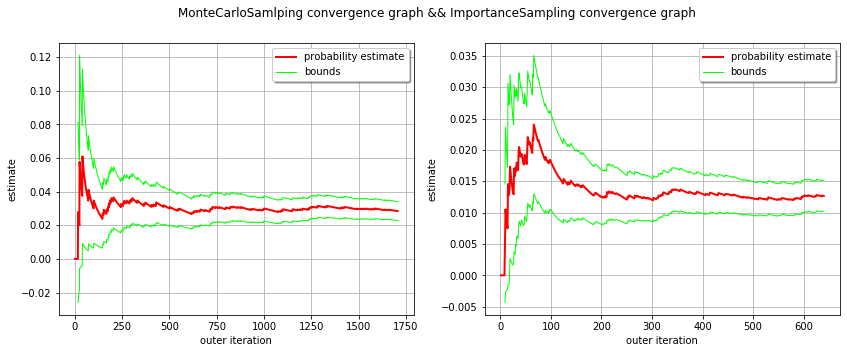

In [15]:
graph1 = MonteCarloSampling(p57, 10000, 0.1)[2]


graph2 = ImportanceSampling(p57)[2]


fig = pl.figure(figsize=(14, 5))
ax_1 = fig.add_subplot(1, 2, 1)
_ = otv.View(graph1, figure=fig, axes=[ax_1])
ax_2 = fig.add_subplot(1, 2, 2)
_ = otv.View(graph2, figure=fig, axes=[ax_2])
_ = fig.suptitle("MonteCarloSamlping convergence graph && ImportanceSampling convergence graph")
